In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

churn_data = pd.read_csv('C:\IDE\data\churn.csv', sep=',')
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data['Loyalty'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Gone')

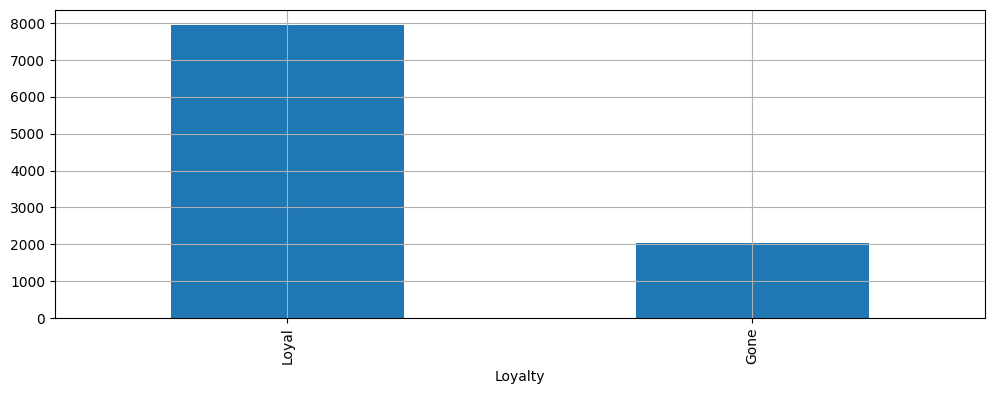

In [118]:
"""Задание 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению."""

churn_data_exited = churn_data['Loyalty'].value_counts()


fig = plt.figure(figsize=(5, 5))
churn_data_exited.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4),
);


#### Вывод:
число лояльных клиентов превышает число ушедших почти в 4 раза (7963 лояльных клиентов, 2037 ушедших клиентов).

**Доля ушедших клиентов составляет 20.37% от общего числа клиентов, что является довольно высоким показателем и требует дополнительного анализа.**

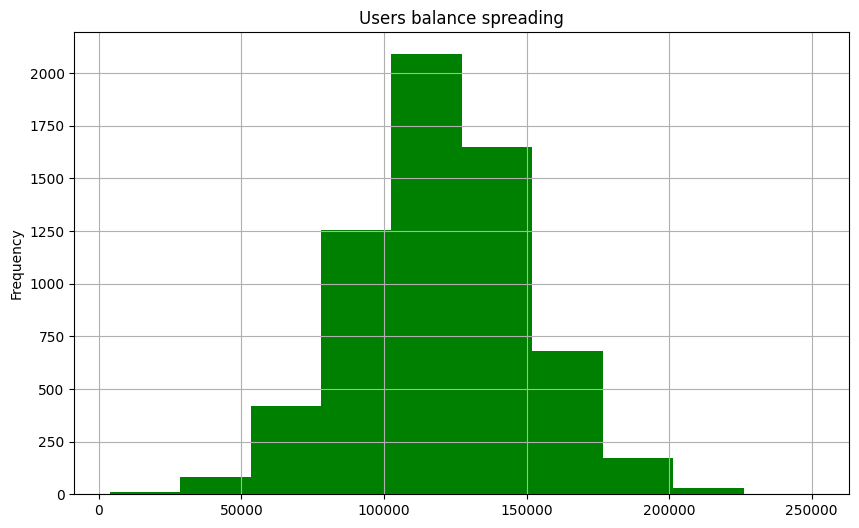

In [29]:
"""Задание 9.2 Постройте график, показывающий распределение баланса пользователей,
у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы."""

churn_data['Balance'] = churn_data['Balance'].astype (int)
churn_data_bal = churn_data[churn_data['Balance'] > 2500]
churn_data_balance = churn_data_bal['Balance']

churn_data_balance.plot(
    kind='hist',
    figsize=(10, 6),
    title='Users balance spreading',
    grid = True,
    color = 'green',
    bins=10
);

#### Вывод: 
 баланс пользователей можно распределить на 4 группы: малочисленная, малая, средняя, большая.
 К **малочисленной** группе можно отнести пользователей с самым высоким балансом (более 200000 долларов, менее 25 пользователей) и с самым низким балансом (менее 57000 долларов, менее 100 пользователей),
 к  **малой** группе можно отнести пользователей с балансом от 151000 до 177000 долларов (менее 680 человек) и пользователей с балансом от 55000 до 80000 долларов (менее 450 человек), 
 к **средней** группе относятся пользователи с балансом от 125000 до 151000 долларов (менее 1600 человек) и пользователей с балансом от 57000 до 112000 долларов (около 1250 человек). 
 **Большая** группа представляет пользователей с балансом от 112000 до 127000 долларов, в неё входит около 2125 человек.

   Учитывая, что доля ушедших клиентов составляет 20.37%, финансовые потери от каждой группы могут составить:
 * малочисленная до 2 179 590 долларов,
 * малая до 28 904 012 долларов,
 * средняя до 66 492 773 доллара,
 * большая до 51 727 069 долларов. 
  
  **Согласно закону Парето, в первую очередь, необходимо выяснить причинs ухода пользователей средней и большой групп.**

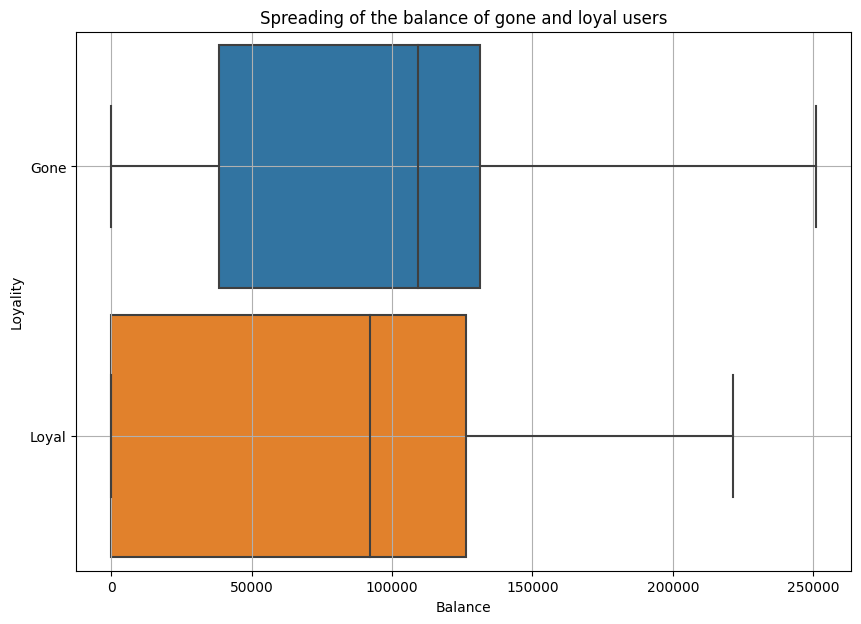

In [28]:
"""Задание 9.3  Посмотрите на распределение баланса клиента в разрезе признака оттока. 
Как различаются суммы на накопительном счёте ушедших и лояльных клиентов?
Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке."""


fig_1 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Loyalty',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Spreading of the balance of gone and loyal users');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Loyality');
boxplot.grid()

#### Вывод:
из диаграммы видно, что медианное значение баланса ушедших пользователей приблизительно на 20 000 долларов больше, чем у лояльных, но находятся оно приблизительно на одном и том же уровне - около 100 000 долларов.
Баланс большинства ушедших пользователей выше, чем у лояльных (от 40 000 до 130 000 долларов у ушедших, от 0 до 125 000 долларов у лояльных), выбросы показывают, что среди ушедших клиентов есть пользователи с самым высоким балансом и с балансом от 40 000 долларов и менее.
    
**Это может быть связано с более привлекательными условиями по вкладам на небольшие суммы, конкуренцией с другими банками в сегменте, некомфортным сервисом, отсутствием гарантий стабильности.**

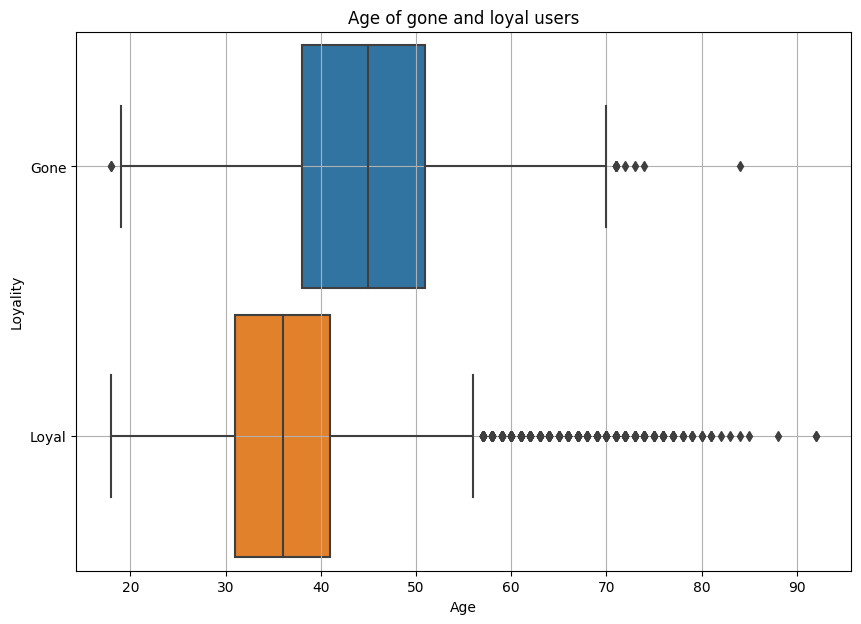

In [30]:
"""Задание 9.4 Посмотрите на распределение возраста в разрезе признака оттока.
В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?"""

fig_2 = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Loyalty',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Age of gone and loyal users');
boxplot.set_xlabel('Age');
boxplot.set_ylabel('Loyality');
boxplot.grid()

#### Вывод:
медианный возраст лояльных клиентов 35-36 лет, медианный возраст ушедших клиентов 45-46 лет. При этом клиентов старше 55 лет среди лояльных клиентов больше, чем ушедших, но также не составляет многочисленную группу. 

**Следует обратить внимание на возрастную группу от 37 до 52 лет.**

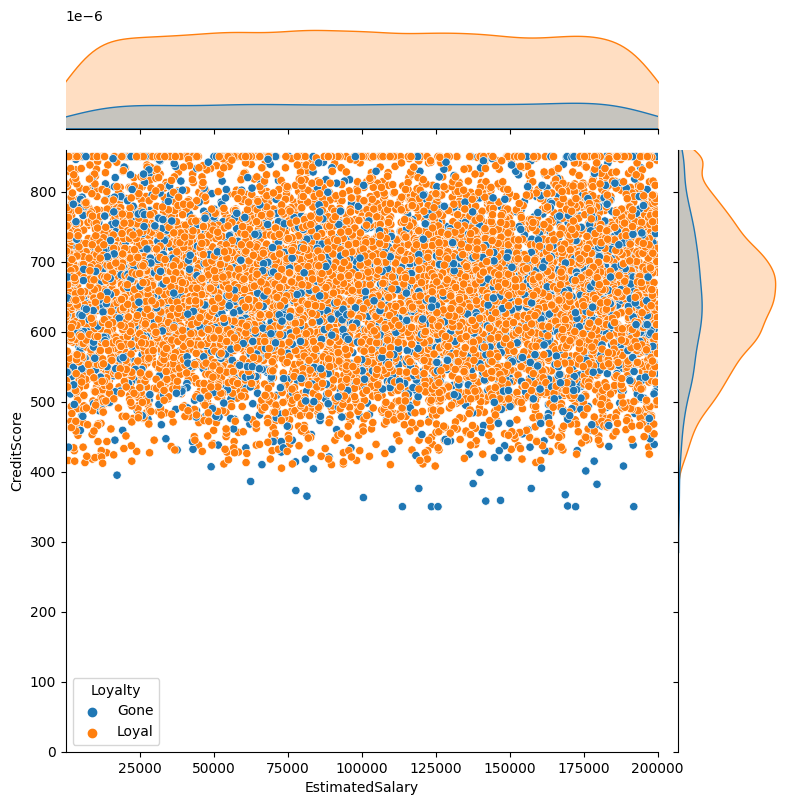

In [17]:
"""Задание 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это. """


jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Loyalty',
    xlim =(11, 200000),
    ylim = (0, 860),
    height=8,
)



#### Вывод:
 основная доля как лояльных, так и ушедших клиентов лежит в области кредитного рейтинга выше среднего. Наибольшее число ушедших клиентов с кредитным рейтингом между 600 и 700 единиц, их заработная плата составляет от 50 000 до 90 000 долларов, а также от 140 000 до 175 000 долларов.

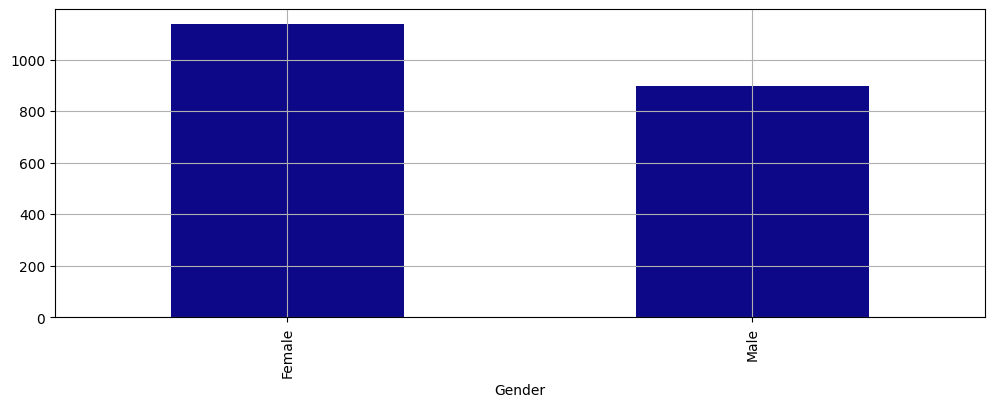

In [82]:
"""Задание 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это."""

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


churn_data = pd.read_csv('C:\IDE\data\churn.csv', sep=',')
churn_data = churn_data.drop(['RowNumber'], axis=1)


churn_data_exit = churn_data[churn_data['Exited'] == 1]['Gender'].value_counts()
churn_data_exit.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);




#### Вывод: 
пользовательницы уходят чаще пользователей. 

C:\Users\1\AppData\Local\Temp\ipykernel_6616\1726859661.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_1.show()


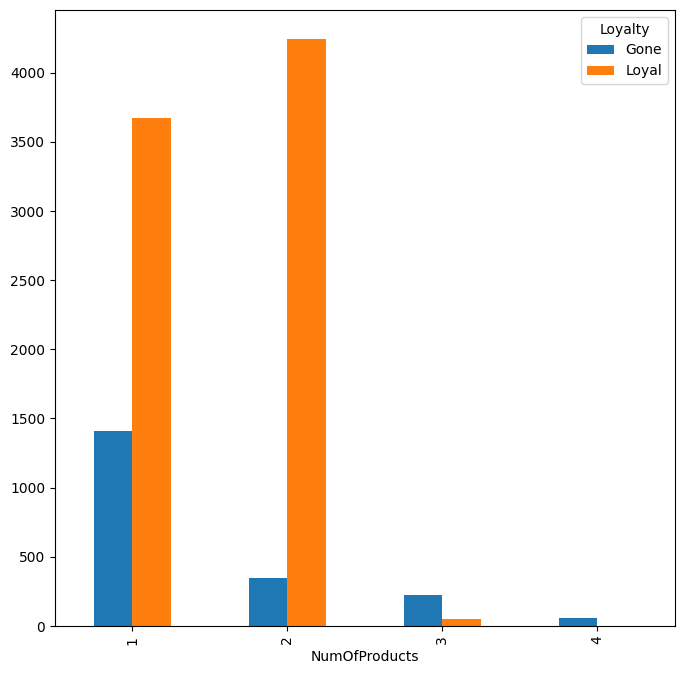

In [19]:
'''9.7. Как отток клиентов зависит от числа приобретённых у банка услуг NumOfProducts?
Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.'''


pivot_1 = churn_data.pivot_table(
    'CustomerId',
    index='NumOfProducts',
    columns='Loyalty',
    aggfunc='count'
)
pivot_1 = pivot_1.fillna(0)

fig_1, axes_1 = plt.subplots(figsize=(8, 8))
pivot_1.plot(
    kind='bar',
    ax=axes_1
)
fig_1.show()




#### Вывод:
клиенты приобретающие одну или две услуги, остаются клиентами банка чаще, в то время, как клиенты, приобретающие три или четрые услуги, уходят, практически, все. 

**Это может быть связано с невыгодными для клиента условиями, обязанностью клиента приобретать услуги, которые ему/ей не нужны. Также следует обратить внимание на то, что, несмотря на высокое значение числа лояльных клиентов среди приобретающих одну услугу, число ушедших клиентов также высоко и составляет более 30%. Это может быть связано с неудовлетворительным качеством услуги, кратковременным выгодным предложением (например, по акции) при отсутствии условий удержания клиента другими услугами, рассчитанными на долгосрочное сотрудничество.**

In [21]:
'''9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, 
иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?'''

'9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, \nиллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?'

C:\Users\1\AppData\Local\Temp\ipykernel_6616\2881914145.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_2.show()


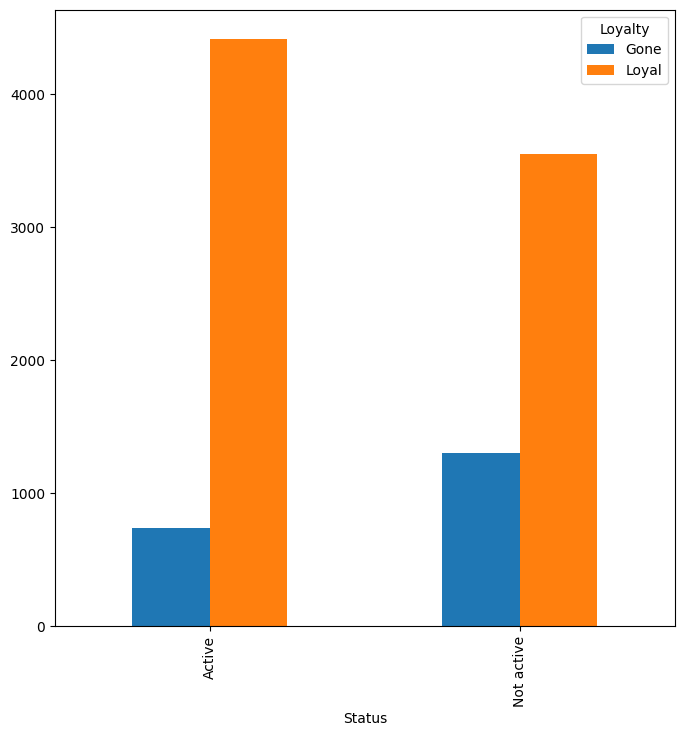

In [25]:
churn_data['NotActiveMember'] = 1 - churn_data['IsActiveMember']
churn_data['Loyalty'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Gone')
churn_data['Status'] = churn_data['IsActiveMember'].apply(lambda x: 'Active' if x == 1 else 'Not active')


pivot_2 = churn_data.pivot_table(
    'CustomerId',
    index='Status',
    columns='Loyalty',
    aggfunc='count'
)
pivot_2 = pivot_5.fillna(0)

fig_2, axes_2 = plt.subplots(figsize=(8, 8))
pivot_2.plot(
    kind='bar',
    ax=axes_2
)
fig_2.show()

#### Вывод:
число лояльных клиентов со статусом активного клиента выше, чем без него, а число ушедших клиентов со статусом активного клиента ниже числа ушедших без статуса почти в два раза. 

**Очевидно, что статус активного клиента влияет на удержание клиента, поэтому его важно предлагать большему числу клиентов, а дополнительные привилегии или выгоды могут повысить его привлекательность. Если таковые уже имеются, необходимо провести дополнительный анализ по наиболее интересным для клиента условиям статуса активного клиента.**

In [26]:
'''Задание 9.9 В какой стране доля ушедших клиентов больше? 
Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
Предположите, с чем это может быть связано'''

churn_countries = churn_data.groupby(['Geography'])[['Exited']].mean()

fig = px.choropleth(
    data_frame=churn_countries, 
    locations=churn_countries.index, 
    locationmode = "country names",
    scope= 'europe',
    color= 'Exited', 
    range_color=[0, 0.35], 
    title='Share of lost customers by country', 
    width=800,
    height=500,
    color_continuous_scale='Plasma'
)

fig.show()

#### Вывод:
**число ушедших клиентов из Германии в два раза превышает число ушедших клиентов из Франции и Испании.** Это может быть связано с сокращением числа банков в Германии, высокими требованиями к минимальному доходу клиента, высоким уровнем банковских сборов, со сложностями при использовании карт банка определённой платёжной системы в других банках или странах, снижением стабильности банка, конкуренцией международных банков.

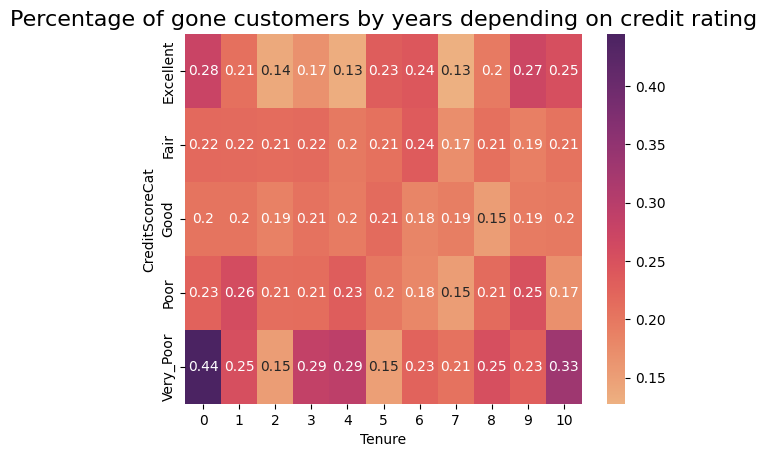

In [31]:
'''Задание 9.10 На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
Найдите на тепловой карте категории клиентов, которые уходят чаще всего.'''


def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot_cat = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc= 'mean',
)
heatmap = sns.heatmap(data=pivot_cat, annot=True, cmap='flare')
heatmap.set_title('Percentage of gone customers by years depending on credit rating', fontsize=16);


#### Вывод: 
в первые мсяцы обслуживания наблюдается самый высокий уровень оттока клиентов среди клиентов категории Very Poor - 44% и категории Excellent - 28%. В последующие годы обслуживания в категории Very Poor также наблюдается высокий отток, за исключением второго и пятого года. На десятом году обслуживания клиенты этой категории также составляют наибольшую долю ушедших клиентов. В категории Excellent доля в 27 и 25% наблюдается на девятый и десятый год обслуживания соответственно. Следующая категория, в которой наблюдается бОльший отток - Poor, здесь сосредоточено, в среднем 23% ушедших покупателей, с наибольшим оттоком в первый и восьмой год обслуживания. Клиенты категорий Good и Fair отказываются от услуг банка приблизительно одинаково, доля ушедших составляет около 20%.

**Диагамма показывает, что клиенты с низким кредитным рейтингом отказываются от услуг банка чаще других, что может быть обусловлено их низкой платёжеспособностью. Следующие за ними клиенты с самым высоким кредитным рейтингом могут отказываться от услуг в связи с отсутствием программы лояльности банка, особенно на длительный период, невыгодными условиями сотрудничества или окончанием ипотечного (или любого другого) кредита. Стабильный отток основной массы клиентов может быть вызван перечисленными выше причинами.**


## Общий вывод:

Основная доля ушедших клиентов составляет 20.37% от общего числа клиентов, в результате анализа было установлено, что от услуг банка отказываются клиенты с более высоким балансом счёта от 40 000 до 130 000 долларов в возрасте от 37 до 52 лет, имеющих кредитный рейтинг между 600 и 700 единиц с  заработной платой от 50 000 до 90 000 долларов, а также от 140 000 до 175 000 долларов.

Женщины отказываются от услуг банка чаще мужчин. Клиенты, приобретающие три или четрые услуги, уходят, практически, все, а доля ушедших клиентов среди приобретающих одну услугу составляет более 30%. 
Число лояльных клиентов со статусом активного клиента выше, чем без него, а число ушедших клиентов со статусом активного клиента ниже числа ушедших без статуса почти в два раза. 

Число ушедших клиентов из Германии в два раза превышает число ушедших клиентов из Франции и Испании.
В первые мсяцы обслуживания от услуг банка чаще всего отказываются клиенты с самым низким и самым высоким кредитным рейтингом. Клиенты с низким кредитным рейтингом уходят чаще других клиентов. Клиенты с самым высоким кредитным рейтингом отказываются от услуг банка на девятом и десятом годах обслуживания. Основная доля клиентов уходит на любом году обслуживания - около 20%.

## Возможные причины:

* отсутствие долгосрочной программы лояльности 
* отсутствие привилегий для клиентов со статусом активного клиента
* обязательные услуги, невыгодные клиенту, связанные с услугами, его интересующими 
* отсутсвтие программ лояльности для пользователей женского пола
* невыгодные кредитные предложения
* отсутствие гарантий стабильнсти для клиентов с высоким уровнем заработной платы
* несовершенная платёжная система в сравнении с другими банками (в том числе и других стран).



